In [1]:
import yaml

with open("config.yaml", "r") as y:
    cfg = yaml.safe_load(y)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv(cfg["credit_limits"]["dataset"])
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
nan_df = dataset.isnull().mean()
nan_df

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [6]:
trash = [
    "CLIENTNUM",
    #"Attrition_Flag",
    #"Total_Revolving_Bal",                                                                                                                   
    #"Avg_Open_To_Buy",                                                                                                                       
    #"Total_Amt_Chng_Q4_Q1",
    #"Card_Category",                                                                                                                  
    #"Total_Trans_Amt",                                                                                                                       
    #"Total_Trans_Ct",                                                                                                                        
    #"Total_Ct_Chng_Q4_Q1",                                                                                                                   
    #"Avg_Utilization_Ratio", 
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]
dataset = dataset.drop(trash, axis = 1)
dataset.head()
print(len(dataset.columns))

20


In [7]:
for i in dataset:
    most_popular_value_count = dataset[i].value_counts().iloc[0]
    print(most_popular_value_count/len(dataset))

0.8393403772094401
0.04937296336526118
0.5290806754221389
0.2697738718277871
0.308877258813074
0.4628221585859583
0.35163424508739016
0.931766564629209
0.2432112175372766
0.22760936111385405
0.379776834205589
0.3337612323491656
0.050162930779105365
0.24390243902439024
0.031993680260689245
0.0035548533622988053
0.001086205194035746
0.02053915275994865
0.016885553470919325
0.24390243902439024


In [8]:
#fig, axes = plt.subplots(5, 2, figsize=(20, 20))
#axes_flattened = axes.reshape(-1)
#for i in range(len(dataset.columns)-1):
#    ax = axes_flattened[i]
#    sns.scatterplot(
#        x=dataset.iloc[:, i],
#        y='Credit_Limit',
#        data=dataset.dropna(),
#        ax=ax,
#    )
#fig.tight_layout(pad=1.0)

Избавление от категории Unknown

In [9]:
dataset["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [10]:
dataset["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [11]:
dataset["Income_Category"].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [12]:
dataset.count()[0]

10127

-30%

In [13]:
#good idea?
dataset = dataset.drop(dataset[(dataset["Income_Category"] == "Unknown") | (dataset["Marital_Status"] == "Unknown") | (dataset["Education_Level"] == "Unknown")].index)
dataset.reset_index(inplace=True,drop=True)
dataset.count()[0]

7081

In [14]:
dataset = dataset.drop(dataset[dataset["Customer_Age"] > 65].index)
dataset.reset_index(inplace=True,drop=True)
dataset.count()[0]

7074

# Выбор метода для категориальных перем.
Label enc - слишком просто. 
One hot enc - нагрузка на dim модель (~3.8).  
Target enc - data leak. 
Frequency enc - хороший вариант. (не очень ~2.8)

In [15]:
# import category_encoders as ce

# count_encoder = ce.CountEncoder(normalize=True)
# dataset["Gender"] = count_encoder.fit_transform(dataset["Gender"])
# dataset["Education_Level"] = count_encoder.fit_transform(dataset["Education_Level"])
# dataset["Marital_Status"] = count_encoder.fit_transform(dataset["Marital_Status"])
# dataset["Income_Category"] = count_encoder.fit_transform(dataset["Income_Category"])
# dataset.head()

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_df = dataset.select_dtypes(include=['object'])
dataset.drop(cat_df.columns, axis=1, inplace=True)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
dataset = dataset.join(pd.DataFrame(onehot_encoder.fit_transform(cat_df)))
dataset

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,6,7,8,9,10,11,12,13,14,15
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7070,56,1,50,4,1,4,3688.0,606,3082.0,0.570,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7071,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7072,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
target = "Credit_Limit"
features = list(dataset.columns)
features.remove(target)
features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15]

Подготовка для использования Lasso

In [18]:
from sklearn.model_selection import train_test_split

x = dataset[features].values
y = dataset[[target]].values.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

Нормализация x_train

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
mean = scaler.mean_
scale = scaler.scale_

Нормализация xtest

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.mean_ = mean
scaler.scale_ = scale
x_test = scaler.fit_transform(x_test)

AttributeError: 'StandardScaler' object has no attribute 'n_samples_seen_'

In [ ]:
pd.DataFrame(y_train).join(pd.DataFrame(x_train), lsuffix='y').to_csv('train.csv', index=False)
pd.DataFrame(y_test ).join(pd.DataFrame(x_test ), lsuffix='y').to_csv('test.csv' , index=False)

In [ ]:
from sklearn import linear_model

x = []
y = []
def append(values, func):
    x.append(values)
    y.append(list(map(func, values)))


def f(a):
    clf = linear_model.Lasso(alpha=a, max_iter=1000000)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
append(np.arange(1, 50, 5), f)

In [ ]:
def f(a):
    clf = linear_model.Ridge(alpha=a, max_iter=1000000)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
append(np.arange(1, 50, 5), f)

In [ ]:
def f(a):
    clf = linear_model.ElasticNet(alpha=a, max_iter=1000000)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
append(np.arange(1, 50, 5), f)

In [ ]:
def f(a):
    clf = linear_model.SGDRegressor(alpha=a, max_iter=1000000)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
append(np.arange(0, 0.5, 0.05), f)

In [ ]:
from sklearn import neighbors
def f(a):
    clf = neighbors.KNeighborsRegressor(a)
    clf.fit(x_train, y_train)
    return clf.score(x_test, y_test)
append(np.arange(1, 20, 1), f)

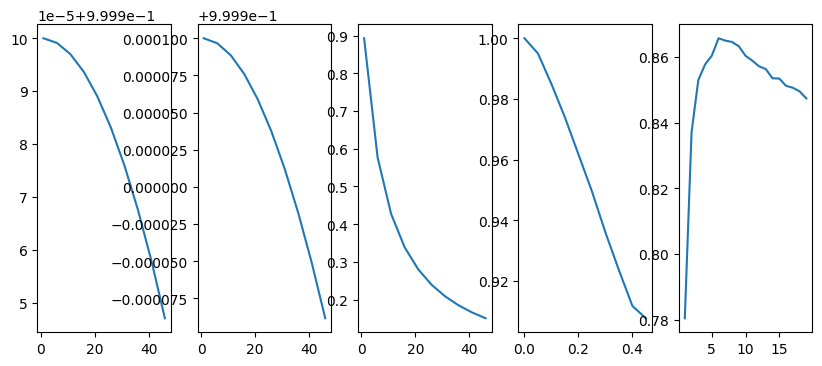

0.9999999749937394
0.9999999029289747
0.893048001717055
0.9999999999896464
0.8657359389730448


In [ ]:
fig, axes = plt.subplots(1,len(y), figsize=(10,4))
for i in range(len(y)):
    axes[i].plot(x[i], y[i])
plt.show()

for list in y:
    print(max(list))

In [ ]:
def test_model(model):
	model.fit(x_train, y_train)
	score = model.score(x_test, y_test)
	print(model.__class__.__name__, 'got score', score)

test_model(linear_model.Lasso(alpha=0, max_iter=1000000))
test_model(linear_model.Ridge(alpha=0, max_iter=1000000))
test_model(linear_model.ElasticNet(alpha=0, max_iter=1000000))
test_model(linear_model.SGDRegressor(alpha=0, max_iter=1000000))

Lasso got score 0.9999999696327594
Ridge got score 1.0
ElasticNet got score 0.9999999696327594
SGDRegressor got score 0.9999999999915612


/tmp/ipykernel_150350/2652839679.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/home/ivan/vs/ML_broken/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_150350/2652839679.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/home/ivan/vs/ML_broken/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
